In [554]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Общая информация

In [555]:
data = pd.read_csv('StPetersburgFlats.csv', delimiter=';', decimal=',', index_col=0).sort_index()
data.head(20)

,Year_Of_Build,Level,Number_Of_Rooms,Distance_To_The_Nearest_MRT-station,Class,Type_Of_Market,Common_Square,Square_Of_Kitchen,Price
Number,,,,,,,,,
171,1960-1980,last,three and more,60-90 minutes,economy,secondary,54.0,7.0,67593.0
10812,2000-2010,middle,one,5-15 minutes,economy,secondary,34.7,10.7,149827.1
10818,1960-1980,middle,one,15-30 minutes,economy,secondary,34.0,6.1,116176.5
10819,2010-2020,middle,three and more,30-60 minutes,economy,secondary,95.0,24.7,126315.8
10822,1960-1980,middle,two,15-30 minutes,economy,secondary,44.5,6.0,100000.0
10831,2010-2020,middle,two,15-30 minutes,economy,secondary,57.6,13.5,156250.0
10833,2010-2020,middle,one,15-30 minutes,economy,secondary,33.0,9.0,153030.3
10834,2010-2020,middle,one,30-60 minutes,economy,primary,47.8,15.5,146443.5
10837,2010-2020,middle,one,15-30 minutes,comfort,primary,35.0,10.0,157142.9


In [556]:
data.shape

(1552, 9)

In [557]:
data.dtypes.value_counts()

object     6
float64    3
dtype: int64

In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 171 to 93544
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year_Of_Build                        1552 non-null   object 
 1   Level                                1552 non-null   object 
 2   Number_Of_Rooms                      1552 non-null   object 
 3   Distance_To_The_Nearest_MRT-station  1552 non-null   object 
 4   Class                                1552 non-null   object 
 5   Type_Of_Market                       1552 non-null   object 
 6   Common_Square                        1552 non-null   float64
 7   Square_Of_Kitchen                    1552 non-null   float64
 8   Price                                1552 non-null   float64
dtypes: float64(3), object(6)
memory usage: 121.2+ KB


In [559]:
data.describe()

,Common_Square,Square_Of_Kitchen,Price
count,1552.000000,1552.000000,1552.000000
mean,58.232088,11.444523,122900.621263
std,23.632642,5.875814,28160.143472
min,20.000000,2.000000,50000.000000
25%,40.000000,7.800000,102361.925000
50%,52.050000,10.400000,118099.300000
75%,72.000000,13.500000,137687.925000
max,129.800000,56.300000,214583.300000


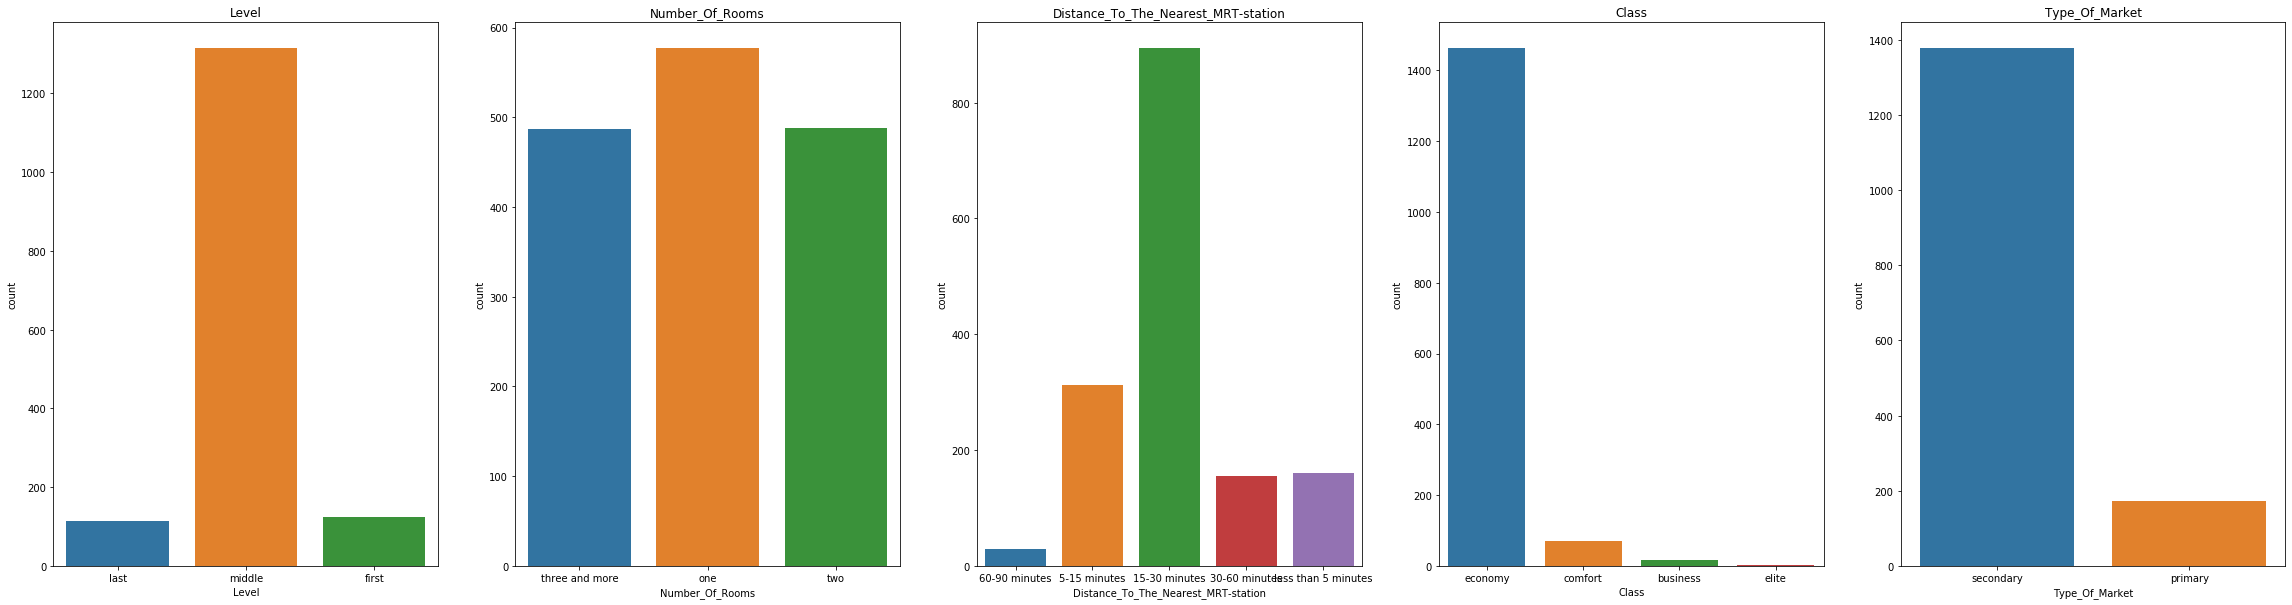

In [560]:
fig, axes = plt.subplots(ncols=5, figsize=(40,10))

str_cl = data.columns[data.dtypes == 'object'].drop('Year_Of_Build')
for i, el in enumerate(str_cl):
    sns.countplot(el, data=data, ax=axes[i])
    axes[i].set_title(el)

### Предобработка

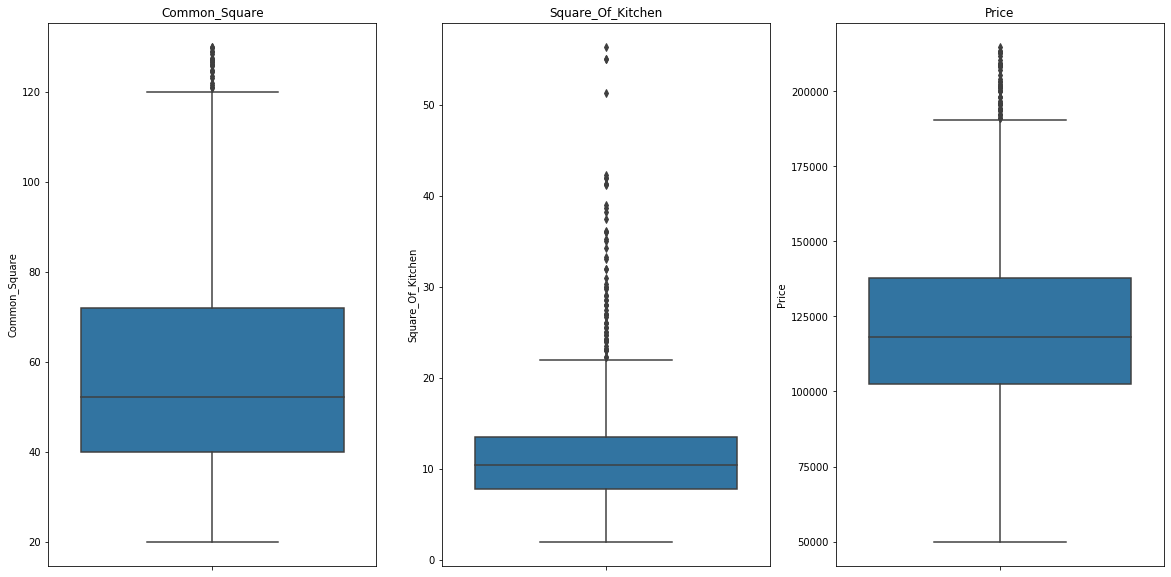

In [561]:
fig, axes = plt.subplots(ncols=3, figsize=(20,10))

fl_cl = data.columns[data.dtypes == float]
for i, el in enumerate(fl_cl):
    sns.boxplot(y=el, data=data, ax=axes[i])
    axes[i].set_title(el)

In [562]:
# std_cs = data['Common_Square'].std()
# std_sok = data['Square_Of_Kitchen'].std()
# std_prc = data['Price'].std()

# mean_cs = data['Common_Square'].mean()
# mean_sok = data['Square_Of_Kitchen'].mean()
# mean_prc = data['Price'].mean()

# data = data[np.logical_and(mean_cs - 3 * std_cs <= data['Common_Square'], mean_cs + 3 * std_cs >= data['Common_Square']) & 
#             np.logical_and(mean_sok - 3 * std_sok <= data['Square_Of_Kitchen'], mean_sok + 3 * std_sok >= data['Square_Of_Kitchen']) & 
#             np.logical_and(mean_prc - 3 * std_prc <= data['Price'], mean_prc + 3 * std_prc >= data['Price'])]

In [563]:
cat_cols = data.columns[data.dtypes == object].drop(labels='Year_Of_Build').tolist()

In [564]:
for el in cat_cols:
    print(data[el].unique())

['last' 'middle' 'first']
['three and more' 'one' 'two']
['60-90 minutes' '5-15 minutes' '15-30 minutes' '30-60 minutes'
 'less than 5 minutes']
['economy' 'comfort' 'business' 'elite']
['secondary' 'primary']


In [565]:
data['Level'] = data['Level'].map({'last': 3, 'middle': 2, 'first': 3})
data['Number_Of_Rooms'] = data['Number_Of_Rooms'].map({'three and more': 3, 'two': 2, 'one': 1})
data['Distance_To_The_Nearest_MRT-station'] = data['Distance_To_The_Nearest_MRT-station'].map({'60-90 minutes': 1, '30-60 minutes': 2, '15-30 minutes': 3, '5-15 minutes': 4, 'less than 5 minutes': 5})
data['Class'] = data['Class'].map({'economy': 1, 'comfort': 2, 'business': 3, 'elite': 4})
data['Type_Of_Market'] = data['Type_Of_Market'].map({'secondary': 1, 'primary': 2})

In [566]:
data['Year_Of_Build'] = data['Year_Of_Build'].apply(lambda y: np.mean(list(map(lambda n: int(n), y.split('-')))))  # swaps to an integer date

In [567]:
data.head(20)

,Year_Of_Build,Level,Number_Of_Rooms,Distance_To_The_Nearest_MRT-station,Class,Type_Of_Market,Common_Square,Square_Of_Kitchen,Price
Number,,,,,,,,,
171,1970.0,3,3,1,1,1,54.0,7.0,67593.0
10812,2005.0,2,1,4,1,1,34.7,10.7,149827.1
10818,1970.0,2,1,3,1,1,34.0,6.1,116176.5
10819,2015.0,2,3,2,1,1,95.0,24.7,126315.8
10822,1970.0,2,2,3,1,1,44.5,6.0,100000.0
10831,2015.0,2,2,3,1,1,57.6,13.5,156250.0
10833,2015.0,2,1,3,1,1,33.0,9.0,153030.3
10834,2015.0,2,1,2,1,2,47.8,15.5,146443.5
10837,2015.0,2,1,3,2,2,35.0,10.0,157142.9


In [568]:
from sklearn.preprocessing import StandardScaler

In [569]:
num_data = data.columns.drop('Price').tolist()

In [570]:
data[num_data] = StandardScaler().fit_transform(data[num_data])

In [571]:
data.head(20)

,Year_Of_Build,Level,Number_Of_Rooms,Distance_To_The_Nearest_MRT-station,Class,Type_Of_Market,Common_Square,Square_Of_Kitchen,Price
Number,,,,,,,,,
171,-1.590674,2.355530,1.280927,-2.682496,-0.229245,-0.355345,-0.179136,-0.756654,67593.0
10812,0.315047,-0.424533,-1.140508,0.859677,-0.229245,-0.355345,-0.996066,-0.126751,149827.1
10818,-1.590674,-0.424533,-1.140508,-0.321047,-0.229245,-0.355345,-1.025696,-0.909873,116176.5
10819,0.859539,-0.424533,1.280927,-1.501772,-0.229245,-0.355345,1.556312,2.256666,126315.8
10822,-1.590674,-0.424533,0.070209,-0.321047,-0.229245,-0.355345,-0.581252,-0.926898,100000.0
10831,0.859539,-0.424533,0.070209,-0.321047,-0.229245,-0.355345,-0.026755,0.349933,156250.0
10833,0.859539,-0.424533,-1.140508,-0.321047,-0.229245,-0.355345,-1.068024,-0.416165,153030.3
10834,0.859539,-0.424533,-1.140508,-1.501772,-0.229245,2.814168,-0.441569,0.690421,146443.5
10837,0.859539,-0.424533,-1.140508,-0.321047,2.976060,2.814168,-0.983368,-0.245921,157142.9


In [572]:
data_y = data['Price']
data_x = data.drop(columns='Price')

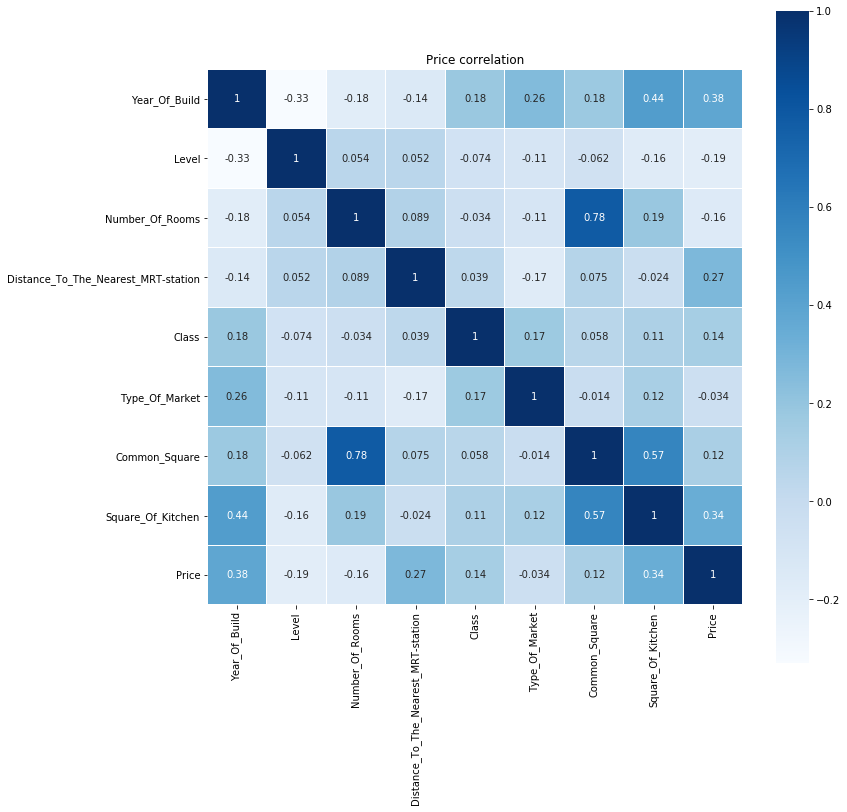

In [573]:
plt.figure(figsize=(12,12))
plt.title('Price correlation')
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Построение моделей

In [574]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [575]:
results_df = pd.DataFrame(columns=['Model', 'R2 score', 'Mean absolute error', 'Mean squared error'])

In [576]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [577]:
def estimating_model_scores(model, params):  
    grid_poly = GridSearchCV(model, params, scoring='r2', cv=k_fold).fit(X_train, y_train)
    r2 = r2_score(grid_poly.best_estimator_.predict(X_test), y_test)
    print('r2_score is:', r2)
    
    grid_poly = GridSearchCV(model, params, scoring='neg_mean_absolute_error', cv=k_fold).fit(X_train, y_train)
    absolute_error = mean_absolute_error(grid_poly.best_estimator_.predict(X_test), y_test)
    print('mean_absolute_error is:', absolute_error)
    
    grid_poly = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=k_fold).fit(X_train, y_train)
    squared_error = mean_squared_error(grid_poly.best_estimator_.predict(X_test), y_test)
    print('mean_squared_error is:', squared_error)
    
    return [r2, absolute_error, squared_error]
    

##### Polynomial regression

In [578]:
alphas = np.logspace(-2, 6, 200)
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(random_state=0))
results_df = results_df.append(pd.Series(['Polynomial regression'] + estimating_model_scores(poly_model, {'ridge__alpha': alphas}), index=results_df.columns), ignore_index=True)

r2_score is: -0.5134306754401095
mean_absolute_error is: 16451.905226286068
mean_squared_error is: 475568593.6709747


##### Random forest

In [579]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap
            }

rf_model = RandomForestRegressor(random_state=0)
results_df = results_df.append(pd.Series(['Random forest'] + estimating_model_scores(rf_model, param_grid), index=results_df.columns), ignore_index=True)

r2_score is: -0.18643420773523833
mean_absolute_error is: 16254.916460201575
mean_squared_error is: 477300944.68863034


##### XGBoost

In [580]:
param_grid = {
            'max_depth': [2, 3, 4, 5],
            'n_estimators': [80, 100]
            }

xgb_model = XGBRegressor(random_state=0)
results_df = results_df.append(pd.Series(['XGBoost'] + estimating_model_scores(xgb_model, param_grid), index=results_df.columns), ignore_index=True)

r2_score is: -0.2665200463581918
mean_absolute_error is: 16305.675043589054
mean_squared_error is: 462932438.40742433


In [581]:
results_df

,Model,R2 score,Mean absolute error,Mean squared error
0,Polynomial regression,-0.513431,16451.905226,4.755686e+08
1,Random forest,-0.186434,16254.916460,4.773009e+08
2,XGBoost,-0.266520,16305.675044,4.629324e+08
